In [18]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [19]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [20]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [21]:
lines = data.readlines()
len(lines)

7352

In [22]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [23]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [24]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [25]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [26]:
#print(pca.explained_variance_ratio_)

In [27]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
sample=scale.fit_transform(z)
pca = PCA(n_components=4)
pca.fit(sample)
sample = pca.transform(sample)

**Elbow using Root Mean Square Standard Deviation**

In [28]:
RMSSTD={}
K = range(2,11)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3","PC4"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            d=(row["PC4"]-cluster_mean["PC4"])**2
            err=math.sqrt(a+b+c+d)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=RMSSTD[k]/len(sample)
    print("RMSSTD = "+str(RMSSTD))

         PC1        PC2        PC3        PC4
0   1.302322 -14.833216   4.104103  -3.452137
1   2.196544 -18.725457   9.903279  -7.659671
2  12.255331  -8.613437   7.579274  -7.398834
3  12.775050  -8.822866  12.506215 -13.241465
4  15.972779  -1.785733  -3.386318   3.113621
Cluster Mean= PC1    17.251108
PC2    -1.246832
PC3    -0.802609
PC4     0.062924
dtype: float64
         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144702 -0.272505
1 -15.296194  1.387144 -0.682223  2.813680
2 -15.137019  2.473351 -1.756649  3.717966
3 -15.350884  3.915681 -1.790308  2.567524
4 -15.544814  4.598737 -2.188541  2.897604
Cluster Mean= PC1   -13.972464
PC2     1.009867
PC3     0.650070
PC4    -0.050965
dtype: float64
RMSSTD = {2: 8.491347414098902}
         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144702 -0.272505
1 -15.296194  1.387144 -0.682223  2.813680
2 -15.137019  2.473351 -1.756649  3.717966
3 -15.350884  3.915681 -1.790308  2.567524
4 -15.544814  4.598737 -2

         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144702 -0.272505
1 -15.137019  2.473351 -1.756649  3.717966
2 -15.350884  3.915681 -1.790308  2.567524
3 -15.544814  4.598737 -2.188541  2.897604
4 -15.359102  4.725043 -2.434385  2.527136
Cluster Mean= PC1   -15.527471
PC2     4.924025
PC3    -0.295072
PC4    -0.180788
dtype: float64
         PC1        PC2        PC3        PC4
0   1.302322 -14.833216   4.104103  -3.452137
1   2.196544 -18.725457   9.903279  -7.659671
2  12.255331  -8.613437   7.579274  -7.398834
3  12.775050  -8.822866  12.506215 -13.241465
4   9.873458  -9.112342   2.899841   4.530149
Cluster Mean= PC1    9.247516
PC2   -7.420964
PC3   -0.855785
PC4    1.108822
dtype: float64
         PC1       PC2       PC3       PC4
0 -15.296194  1.387144 -0.682223  2.813680
1 -12.368140 -6.380008  2.862993  1.131693
2 -15.156826 -0.727552  2.025430  1.951296
3 -15.469740  1.190094  0.311332  2.585671
4 -13.855942 -1.783951  3.591041 -0.554374
Cluster Mean= PC1 

         PC1       PC2       PC3       PC4
0  15.972779 -1.785733 -3.386318  3.113621
1  19.009370  0.869939 -3.386178  1.162815
2  17.246079  1.724712 -2.495912  1.096932
3  18.660166  0.585284 -3.275407  2.988469
4  15.358845 -3.155847 -2.923373  3.164127
Cluster Mean= PC1    15.024355
PC2    -0.963374
PC3    -3.363329
PC4    -0.666383
dtype: float64
         PC1        PC2       PC3       PC4
0  -7.009198 -12.530542  8.993016 -4.400805
1  -4.109829 -11.774816  1.980972  2.574105
2  -2.444600 -15.632564  5.406624  0.407140
3  -6.870555 -12.799864  9.440924 -5.719262
4 -10.252672  -7.597760  4.804131 -4.302987
Cluster Mean= PC1   -8.679063
PC2   -9.241120
PC3    6.704806
PC4   -3.521150
dtype: float64
         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144702 -0.272505
1 -14.689137 -4.467166  6.950440 -2.647703
2 -15.497365  0.484498  4.147410 -1.090005
3 -13.615192 -4.783294  6.307573 -3.804225
4 -15.445677 -0.525916  5.929431 -3.240141
Cluster Mean= PC1   -14.879863

In [29]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[8.491347414098902, 7.363912692134917, 6.807665702993259, 6.043152777010521, 5.738563285174745, 5.338791358299966, 5.1638544767502, 4.858980084804306, 4.758731843591573]


[[3, -1.1274347219639846],
 [4, -0.5562469891416582],
 [5, -0.7645129259827383],
 [6, -0.30458949183577566],
 [7, -0.399771926874779],
 [8, -0.17493688154976628],
 [9, -0.3048743919458943],
 [10, -0.10024824121273301]]

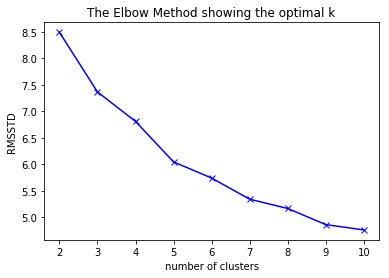

In [30]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
slope

[[3, -1.1274347219639846],
 [4, -0.5562469891416582],
 [5, -0.7645129259827383],
 [6, -0.30458949183577566],
 [7, -0.399771926874779],
 [8, -0.17493688154976628],
 [9, -0.3048743919458943],
 [10, -0.10024824121273301]]

In [32]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7


In [33]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 5
